# Disputed Author Project (dap)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

authors = '/Users/thughes/Dropbox/Code/disputed_authors/Classics/'

dataset = pd.DataFrame(columns=['meta_author', 'meta_title', 'meta_body'])

for author in os.listdir(authors):
    for doc in os.listdir(authors+author):
        print "Adding", author, doc
        f = open(authors+author+"/"+doc)
        s = f.read()
        f.close
        
        dp = {
            'meta_author': author,
            'meta_title': doc,
            'meta_body': s
        }
        
        dataset = dataset.append(dp, ignore_index=True)
        


Adding Plato Alcibiades_I
Adding Plato Alcibiades_II
Adding Plato Euthyphro


In [5]:
# Convert the text into tf_idf values
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()

tf_idf_vec = vec.fit_transform(dataset['meta_body'])

In [6]:
# Convert the tf_idf matrix into a data frame with labels
tf_idf_df = pd.DataFrame(columns=vec.get_feature_names(), data=tf_idf_vec.toarray())

In [7]:
# Combine the original data set with the tf_idf dataframe
cluster_df = dataset.join(tf_idf_df)

In [8]:
cluster_df = cluster_df.set_index('meta_title')

In [9]:
# These are our final data sets.  y is author, X contains the text data
y_set = cluster_df['meta_author']
X_set = cluster_df.drop('meta_author', 1)

In [10]:
# Cluster the model using a Gaussian Mixture Method
from sklearn.mixture import GMM

cluster = GMM()

cluster.fit(X_set.drop('meta_body', 1))

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=1, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)

In [11]:
# Naive way to graph a cluster is just reduce the dimensions to 2 with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_plotdata = pca.fit_transform(X_set.drop('meta_body', 1))

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


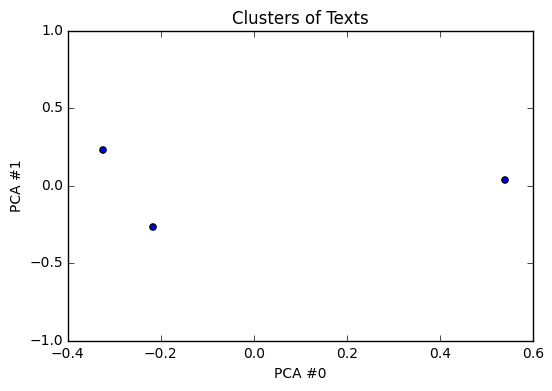

In [12]:
# Graph the results on a 2D plane
import matplotlib.pyplot as plt

%matplotlib inline

plt.ylabel('PCA #1')
plt.xlabel('PCA #0')
plt.ylim(ymin=-1, ymax=1)
plt.title('Clusters of Texts')
plt.scatter(pca_plotdata[:,0], pca_plotdata[:,1])


plt.show()